<a href="https://colab.research.google.com/github/aws3ma/traitement-image-video/blob/main/TP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP5:  Compression vidéo : Modules de prédiction. 
                                                                               Nom: Trabelsi
                                                                               Prénom: Oussema
                                                                               Groupe: 2IDSD 2 Groupe 2

Vu que la vidéo est une donnée très volumineuse pour le stockage ainsi que pour le transfert sur réseau, la compression vidéo est une étape mondiales pour communiquer et manipuler des vidéos, surtout de grande définition ou résolution. 

Plusieurs standards compression vidéo ont vu le jour pour améliorer à chaque fois le débit binaire, le taux de compression tout en gardant la même qualité d'images.
A travers les standards de compression vidéo, la chaine de codage et de décodage ont gardé la même allure. Par contre les détails des modules de la chaine de codec ont évolué d'un standard à un autre. 
Le principe du codec hybride a été toujours la base de ces standard. En effet, un codec hybride se base sur la prédiction Intra et Inter qui profite respectivement de la redondance spatiale et la redondance temporelle.

Ce TP a pour but de comparer deux images d'une vidéo de test afin de détecter les redondance temporelle traitée par le module " Inter Prédiction " de la chaine d'encodage.

Les étapes à suivre sont :

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
trait_img_vid_folder='/content/drive/MyDrive/trait_img_vid/'

Mounted at /content/drive




## A. Lecture de video
1- Lire la vidéo 'akiyo-cif-clip.mp4' à partir de votre répertoire de travail.

2- Séparer les images de la vidéo et sauvegarder l'image 4 et 5 dans un répertoire Images sous le nom ImageRef,ImageSRC.

3- comparer les deux images résultantes et interpréter.

4- Afficher la difference entre les deux images.




In [ ]:
import cv2 as cv
vid = cv.VideoCapture(trait_img_vid_folder+"TP5/akiyo-cif-clip.mp4")

In [ ]:
i=0
while(vid.isOpened()):
    ret, frame = vid.read()
    if ret == False or i>5:
        break
    if(i ==4):
      imref=frame
      cv.imwrite(trait_img_vid_folder+"TP5/Images/ImageRef.jpg",frame)
    if(i==5):
      imsrc=frame
      cv.imwrite(trait_img_vid_folder+"TP5/Images/ImageSRC.jpg",frame)
    i+=1

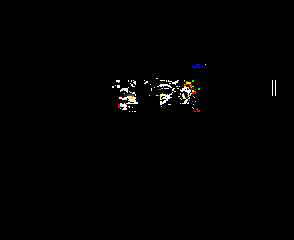

In [ ]:
from google.colab.patches import cv2_imshow
imdif=imsrc-imref
cv2_imshow(imdif)

Il y'a des petits differences entre la frame reference(4) et la frame SRC(5)

## B. Comparer les images 

Pour pouvoir chercher les différences entre deux images, on va faire recours à une métrique de comparaison de blocs d'images pixel par pixel. Cette métrique est la fonction SAD .
SAD : Sum of Absolute Difference
L’algorithme SAD calcule la différence en valeur absolue entre un bloc source (16x16 pixels) et un bloc d’une image de référence (16x16 pixels).
Utiliser dans le traitement d’image et vidéo, pour calculer la différence entre 2 images :
$$ SAD= \sum_{i=0}^{16} \sum_{j=0}^{16}|src(i,j)-ref(i,j)| $$

1- Développer la fonction SAD 

2- Appliquer SAD sur deux images successives de la vidéo akiyo. Soit les images 4 et 5.


In [ ]:
def sad(im2,im1):
    im21=im2.flatten()
    im11=im1.flatten()
    l=[]
    im_size=im21.shape[0]
    return (sum(abs(im21-im11)))
sad(imref,imsrc)

673585


## C. Principe de prediction Inter 
1- Appliquer la fonction SAD pour chercher les macroblocks les plus similaires dans toutes l'image.
Interpréter.
2- La recherche d'un macroblock dans une image est trés couteux en termes de nombre de cycles. Limiter la recherche dans une zone de 3x3 macroblock.

In [ ]:
def diff(im2,im1):
    l=[]
    im21=im2.flatten()
    im11=im1.flatten()
    bs=16*16
    im_size=im21.shape[0]
    for i in range(im_size//bs):
        l.append(sad(im21[(i)*bs:(i+1)*bs],im11[(i)*bs:(i+1)*bs]))
    return l

In [ ]:
diff(imref,imsrc).count(0)


734